# Exploratory Data Analysis - Retail

### Task :  Perform Exploratory Data Analysis on the dataset 'SampleSuperstor' and look for weak aread where you can work to make more profit. Also, deriving business problems by exploring the data.

Tool Chosen : Python

DataSet : https://bit.ly/3i4rbWl

### Importing Libraries

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

### Importing the DataSet

In [104]:
data = pd.read_csv('C:\\Users\\palak\\Jupyter\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Getting insights about data in order to perform data cleaning
It is performed to check the data type of all the features and if they have any null values. To determine if there are any outliers.

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**The number of categorical features is 8 and the number of numerical features is 5, one of them being postal code. Also, we get that there are no null values in the given dataset.**

In [106]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### To check the number of unique categories in each categorical feature

In [107]:
data.select_dtypes(include ='object').nunique()

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

### Getting rid of duplicate entries

In [108]:
data[data.duplicated(subset=None , keep=False)]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864


In [109]:
# To know the number of duplicate entries

data[data.duplicated(subset=None , keep=False)].shape


(34, 13)

So, the number of duplicate entries is 34. 

Now, dropping these entries from the dataset in order to make it cleaner to use.

In [110]:
data = pd.DataFrame.drop_duplicates(data)

**Although the feature of Postal Code contains int values but the feature is not of much importance in order to target the profit. Also, the feature Country has only one category. So dropping the features 'Postal Code' and 'Country'.**

In [111]:
data = data.drop(['Country','Postal Code'], axis=1)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Shape of the new dataset which will be used for further analysis.**

In [112]:
data.shape

(9977, 11)

### Checking relation between features

In [113]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


We obtain a heatmap in order to get insight of correlation between the features that have numerical categories, namely 'Sales', 'Discount', 'Quantity', 'Profit'. 

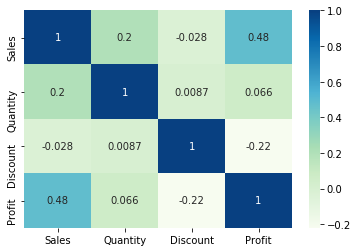

In [114]:
sns.heatmap(data.corr(),annot=True,cmap='GnBu');

# Exploratory Data Analysis

### Obtaining countplots

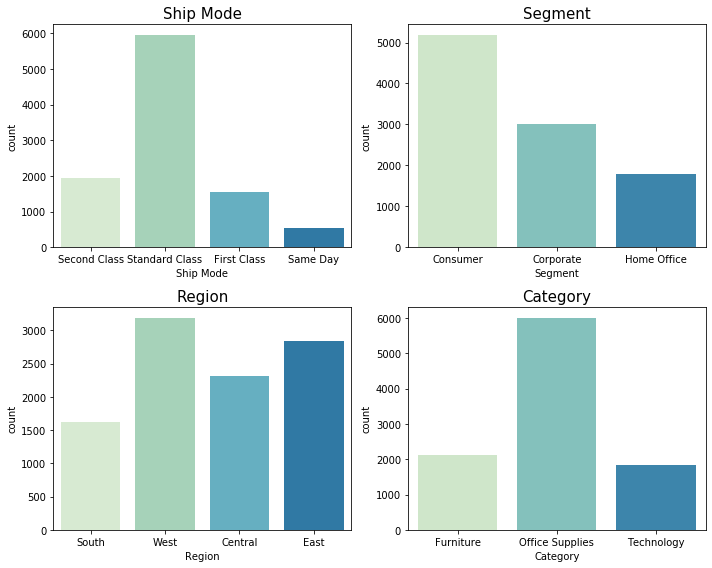

In [116]:
fig, axss = plt.subplots(2,2, figsize=(10,8));

sns.countplot('Ship Mode', ax = axss[0][0], data=data, palette = 'GnBu')
axss[0][0].set_title('Ship Mode', fontsize = 15)

sns.countplot('Segment', ax = axss[0][1], data=data, palette = 'GnBu')
axss[0][1].set_title('Segment', fontsize = 15)

sns.countplot('Region', ax = axss[1][0], data=data, palette = 'GnBu')
axss[1][0].set_title('Region', fontsize = 15)

sns.countplot('Category', ax = axss[1][1], data=data, palette = 'GnBu')
axss[1][1].set_title('Category', fontsize = 15)


plt.tight_layout()


For each of the four categorical features, plots depicting the count of categories is obtained.

The maximum number of products, approximately 6000, are shipped by the mode of standard class whereas a very less number of products, less than 1000, is shipped the same day.

More than 5000 product users are consumers and less than 2000 is for home office.

Maximum products are sold in the West region. However, number of products sold in the South is almost half of West.

The office supplies cover the majority of range of products and furniture and technology covers approximately 2000.

### Relation between sales and profit

Text(0, 0.5, 'Profit in USD')

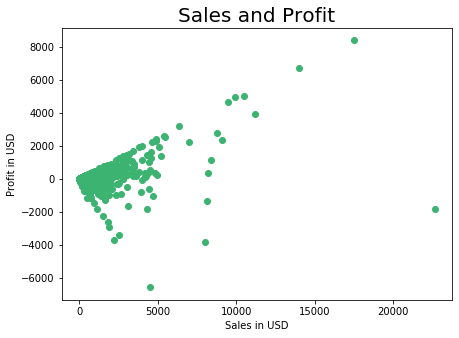

In [117]:
plt.subplots(figsize=(7,5))
plt.scatter(x = 'Sales', y = 'Profit', data=data, color = 'mediumseagreen')
plt.title('Sales and Profit',fontsize=20)
plt.xlabel('Sales in USD')
plt.ylabel('Profit in USD')

### State-wise sale

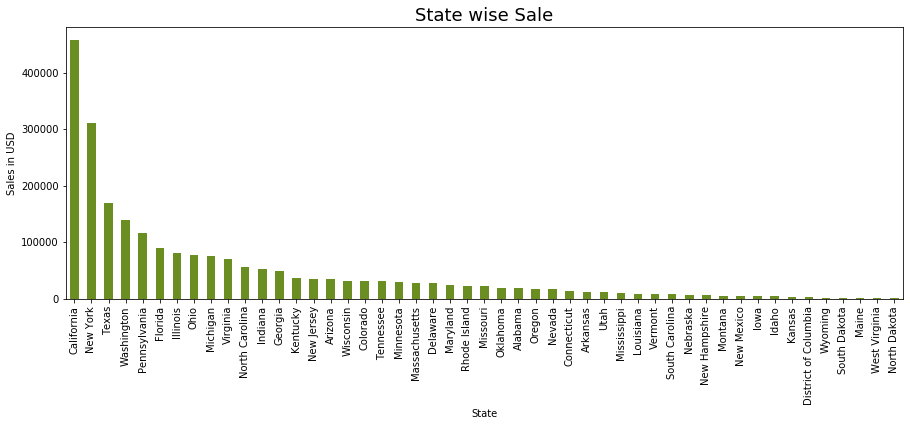

In [118]:
fig = plt.figure(figsize=(15,5))
data.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(color='olivedrab');
plt.xlabel('State')
plt.ylabel('Sales in USD')
plt.title('State wise Sale',fontsize=18);

### State wise Quantity Sold

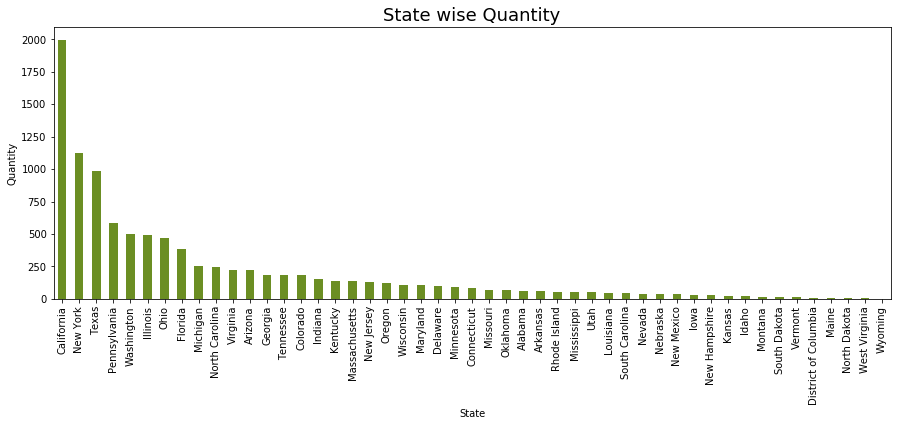

In [119]:
fig = plt.figure(figsize=(15,5))
data.groupby('State')['Quantity'].count().sort_values(ascending = False).plot.bar(color='olivedrab');
plt.xlabel('State')
plt.ylabel('Quantity')
plt.title('State wise Quantity',fontsize=18);

### State wise profit

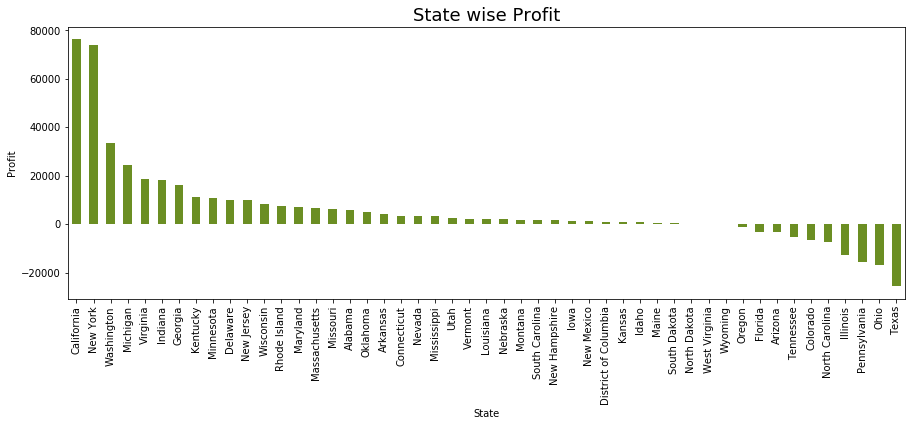

In [120]:
fig = plt.figure(figsize=(15,5))
data.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(color='olivedrab');
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State wise Profit',fontsize=18);

### State wise Discount

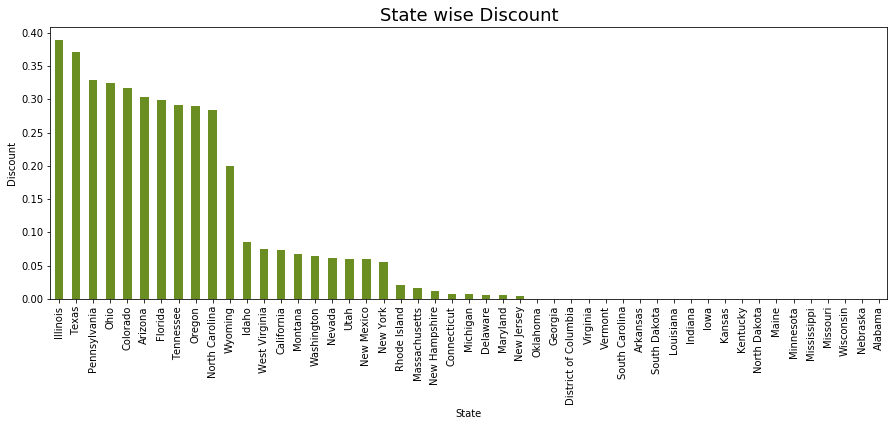

In [121]:
fig = plt.figure(figsize=(15,5))
data.groupby('State')['Discount'].mean().sort_values(ascending = False).plot.bar(color='olivedrab');
plt.xlabel('State')
plt.ylabel('Discount')
plt.title('State wise Discount',fontsize=18);

California experiences maximum sales, followed by New York. Then next is Texas, where sales are less than half of the maximum sales. Whereas, West Virginia and North Dakota experience minimum sales.
Number of products sold is highest in California and New York, whereas lowest in West Virginia and Wyoming.
California and New York have profit, nearly same whereas Texas remain in massive loss as compared to other states.
Illinois observes medium sales and quantity and offers highest discount yet remains in great loss.

### Region wise Profit

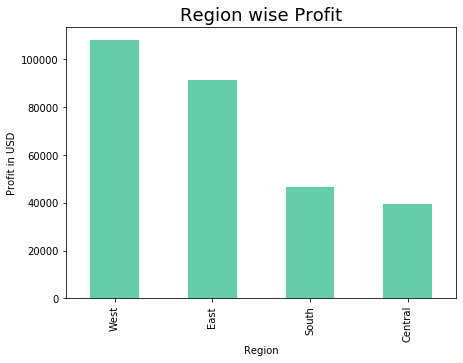

In [122]:
fig = plt.figure(figsize=(7,5))
data.groupby('Region')['Profit'].sum().sort_values(ascending = False).plot.bar(color='mediumaquamarine');
plt.xlabel('Region')
plt.ylabel('Profit in USD')
plt.title('Region wise Profit',fontsize = 18);

### Region wise Sales

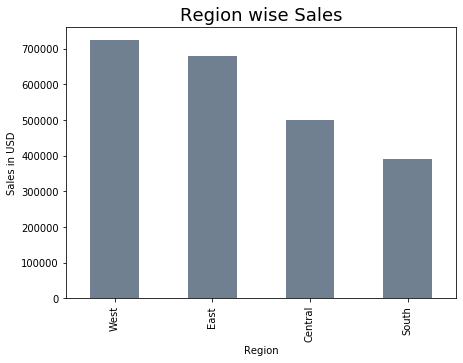

In [123]:
fig = plt.figure(figsize=(7,5))
data.groupby('Region')['Sales'].sum().sort_values(ascending = False).plot.bar(color = 'slategrey')
plt.xlabel('Region')
plt.ylabel('Sales in USD')
plt.title('Region wise Sales', fontsize =  18);

The region wise sales and profit go hand in hand with being highest in the West and lowest in the south.

### Category-wise profit earned

We will figure out 10 most profit giving states and then get insight of this profit category and subcategory wise.

In [124]:
top_10_profit = [x for x in data.groupby('State')['Profit'].sum().sort_values(ascending = False).head(10).index]
top_10_profit

['California',
 'New York',
 'Washington',
 'Michigan',
 'Virginia',
 'Indiana',
 'Georgia',
 'Kentucky',
 'Minnesota',
 'Delaware']

In [125]:
# function for checking profit of each category in each state

def state_data_viewer(states):     # here states will be top_10_profit
    
    # now there are 3 categories implies three graphs per state
    # each category further has subcategories, implies bars will show the profit earned by each subcategory
    
    product_data = data.groupby(['State'])  # considering the grouping of states NJ, NY etc
    
    for state in states:
        df = product_data.get_group(state).groupby(['Category'])  
        
        # for a particular state, say NJ, get group of NJ and make further groups in terms of three categories
        
        fig, axs = plt.subplots(1, 3, figsize = (25,5))
        fig.suptitle(state, fontsize = 18)
        axs_index = 0
        
        # now plot one graph for each category
        
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            
            # plotting subcategory in each category
            
            category_data = df.get_group(category).groupby(['Sub-Category']).mean()
            sns.barplot(x = category_data.index, y = category_data.Profit, ax = axs[axs_index], palette = 'GnBu')
            axs[axs_index].set_xlabel(category, fontsize=18)
            axs_index = axs_index + 1

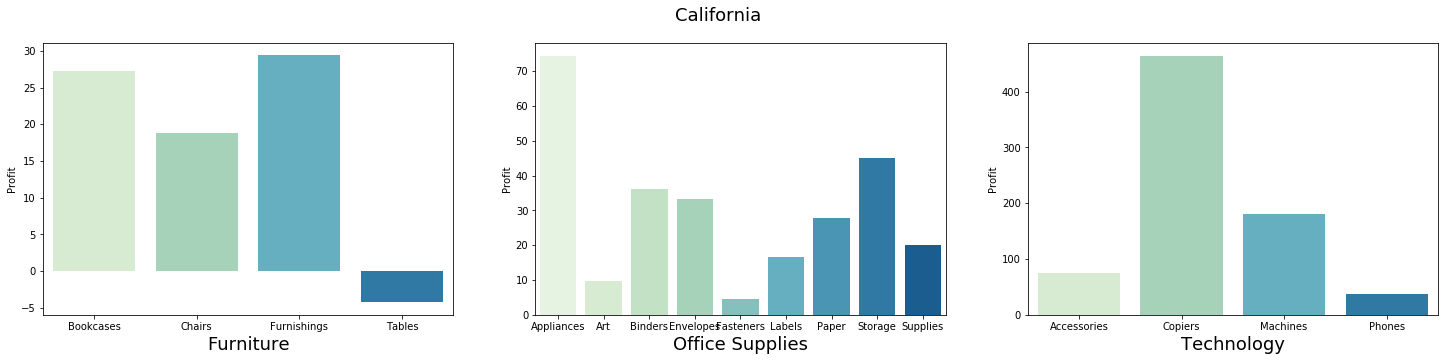

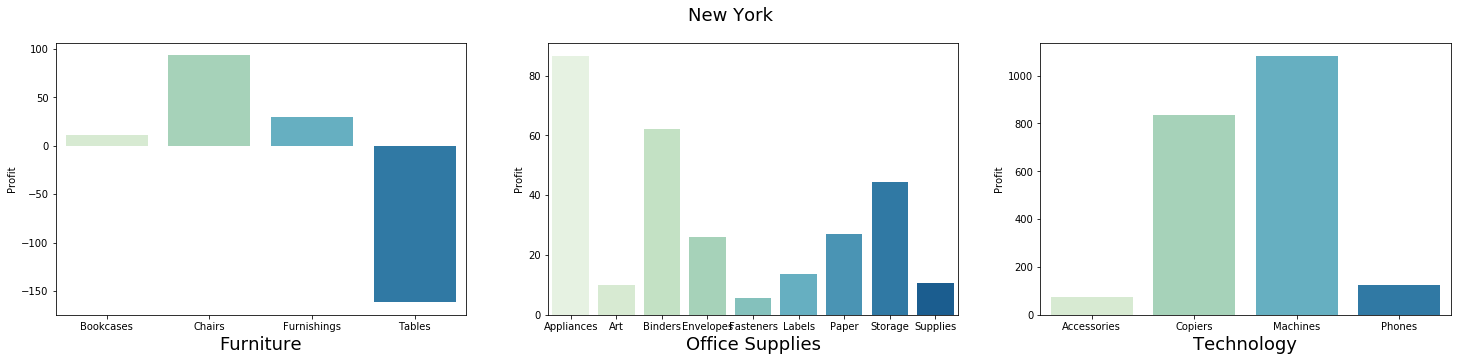

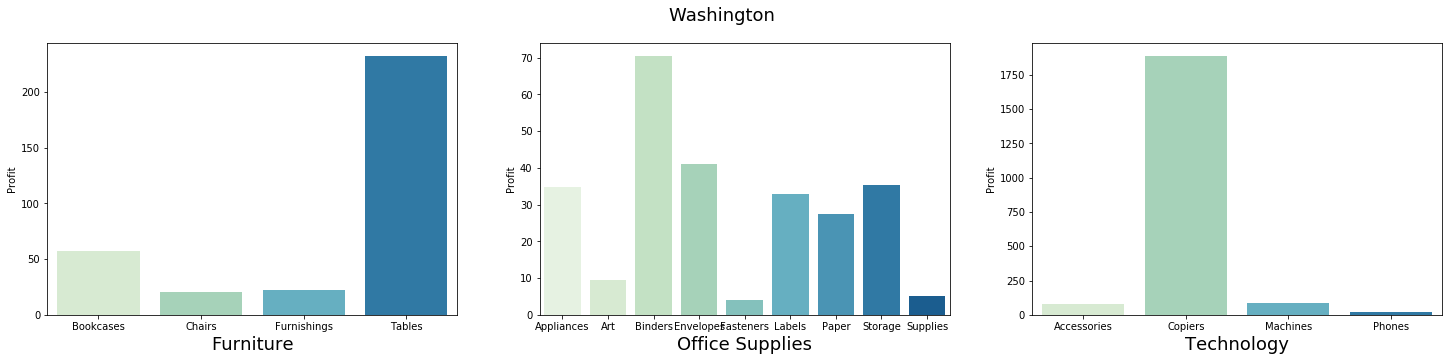

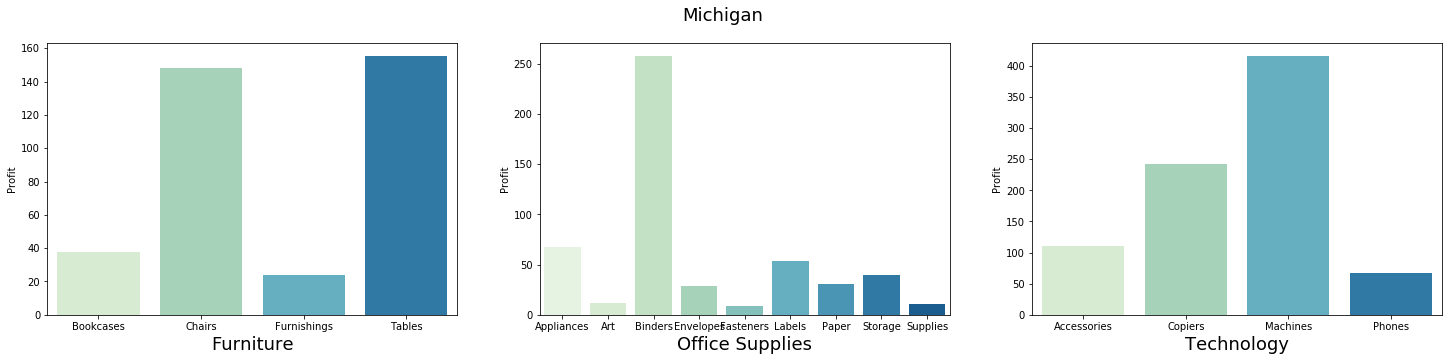

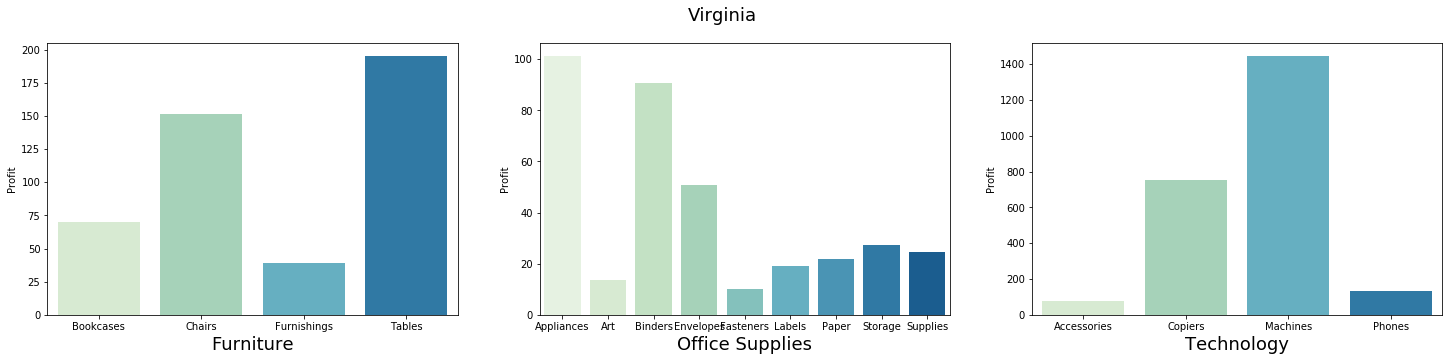

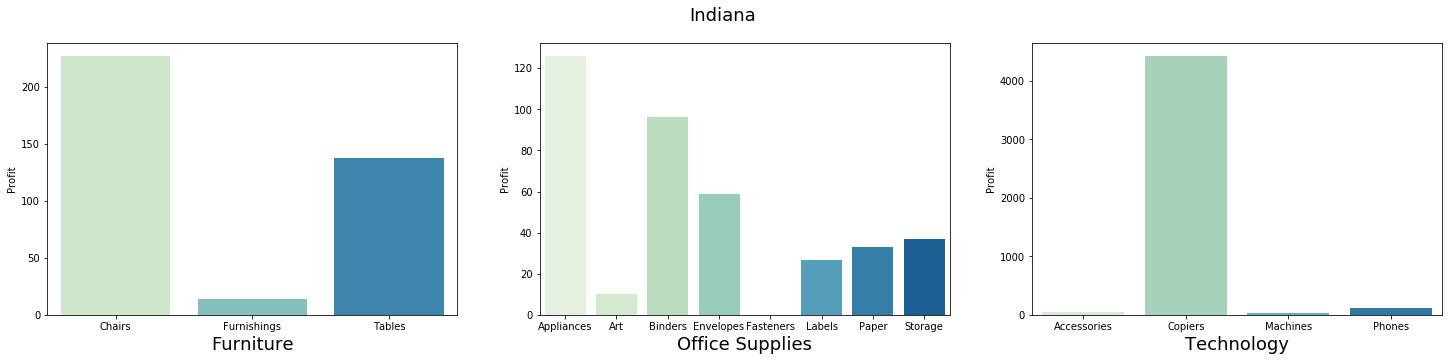

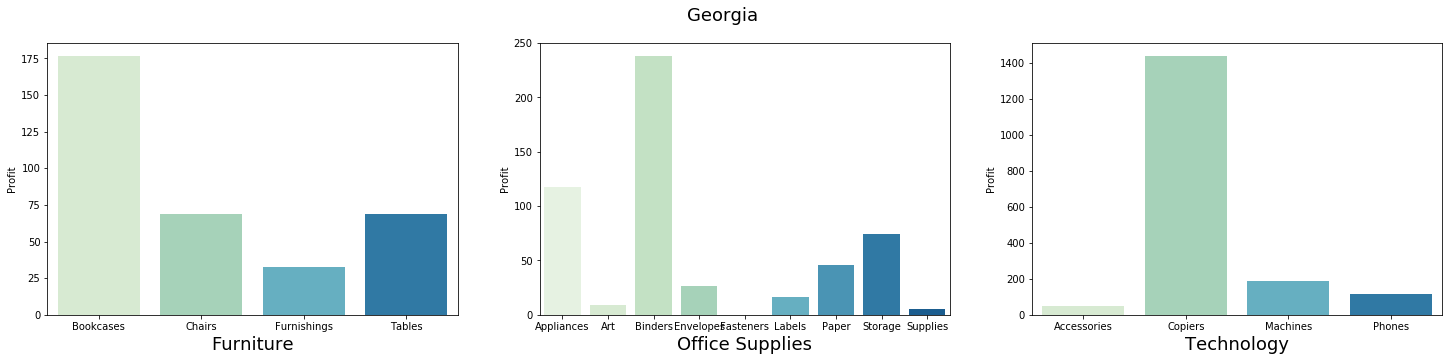

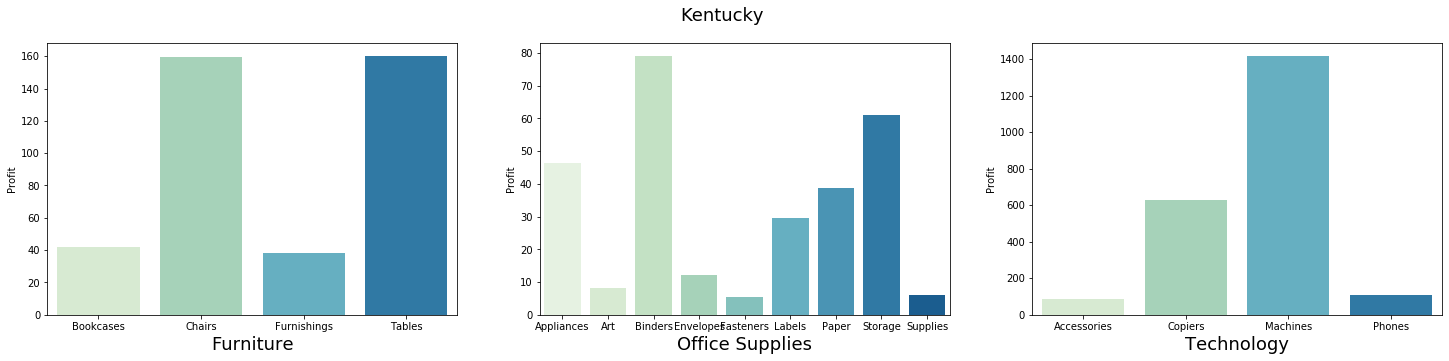

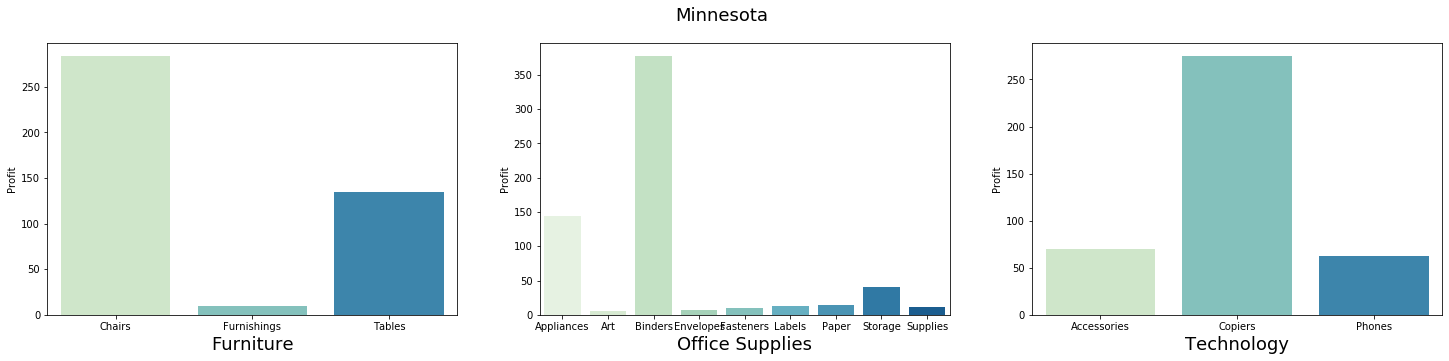

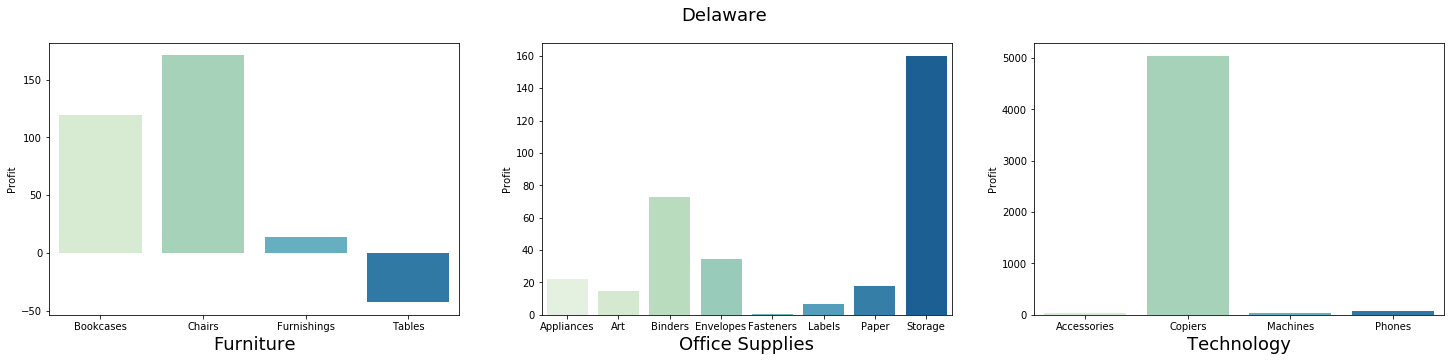

In [126]:
state_data_viewer(top_10_profit)

### Sub-Category wise Quantity Sold

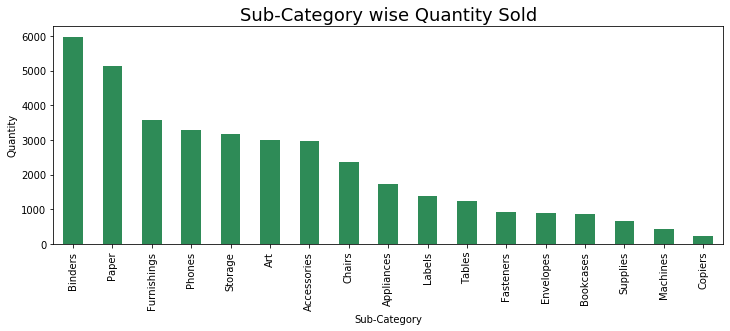

In [127]:
fig = plt.figure(figsize = (12,4))
data.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending = False).plot.bar(color = 'seagreen')
plt.ylabel('Quantity')
plt.title('Sub-Category wise Quantity Sold', fontsize = 18);

### Average Price of Sub-Categories

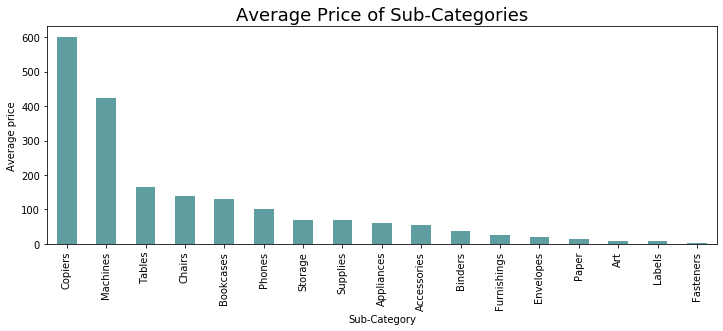

In [128]:
data['Price of one unit'] = data['Sales']/data['Quantity']

fig = plt.figure(figsize = (12,4))
data.groupby(['Sub-Category'])['Price of one unit'].mean().sort_values(ascending = False).plot.bar(color = 'cadetblue')
plt.ylabel('Average price')
plt.title('Average Price of Sub-Categories', fontsize = 18);

### Average Profit of Sub-Categories

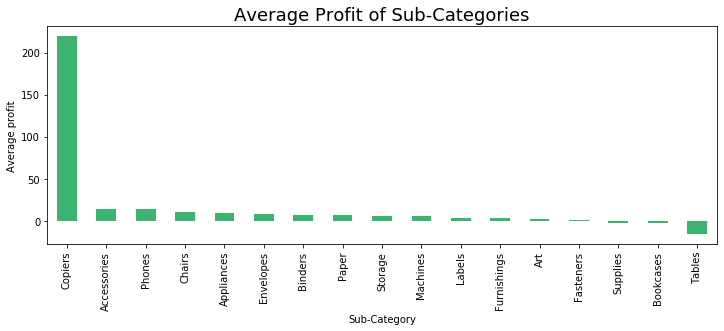

In [129]:
data['Profit by one unit'] = data['Profit']/data['Quantity']

fig = plt.figure(figsize=(12,4))
data.groupby(['Sub-Category'])['Profit by one unit'].mean().sort_values(ascending = False).plot.bar(color = 'mediumseagreen')
plt.ylabel('Average profit')
plt.title('Average Profit of Sub-Categories', fontsize = 18);

### Average Sales of Sub-Categories

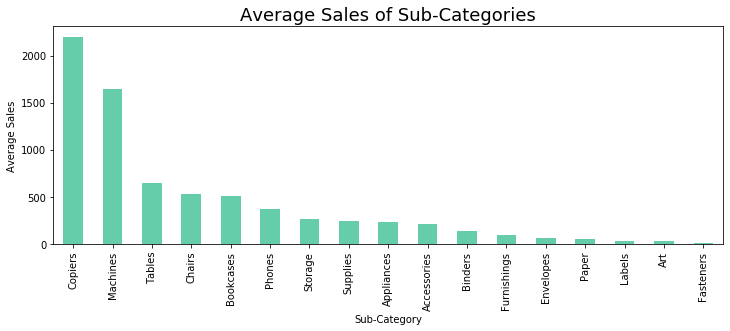

In [130]:
fig = plt.figure(figsize=(12,4))
data.groupby(['Sub-Category'])['Sales'].mean().sort_values(ascending = False).plot.bar(color = 'mediumaquamarine')
plt.ylabel('Average Sales')
plt.title('Average Sales of Sub-Categories',fontsize = 18);

The product sold in maximum quantity is Blinders with average price less than 50 and profit being quite less. The average price is highest of copiers, but are sold in minimum quantity, yet earning maximum profit with maximum sales.

### Average Sales and Profit of Categories

<Figure size 1440x504 with 0 Axes>

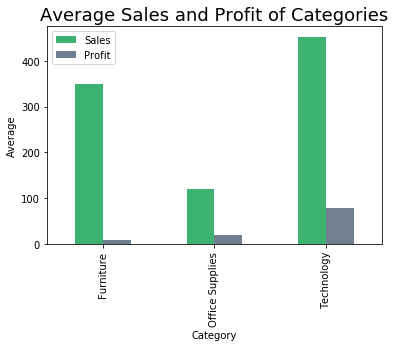

In [131]:
fig = plt.figure(figsize=(20,7));
data.groupby(['Category'])[['Sales','Profit']].mean().plot.bar(color = ['mediumseagreen','slategrey'])
plt.ylabel('Average')
plt.title('Average Sales and Profit of Categories',fontsize = 18);

### Average Sales and Profit of Ship Mode

<Figure size 432x288 with 0 Axes>

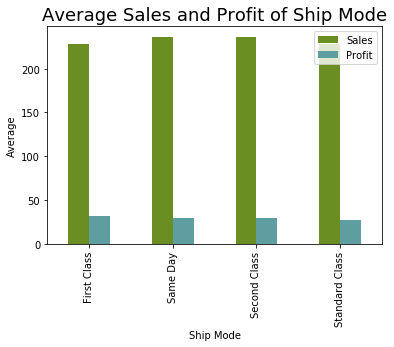

In [132]:
fig = plt.figure();
data.groupby(['Ship Mode'])[['Sales','Profit']].mean().plot.bar(color = ['olivedrab','cadetblue'])
plt.ylabel('Average')
plt.title('Average Sales and Profit of Ship Mode',fontsize = 18);

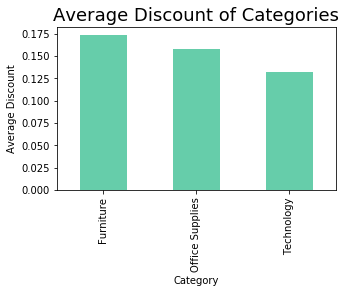

In [137]:
plt.figure(figsize=(5,3))
data.groupby(['Category'])['Discount'].mean().sort_values(ascending = False).plot.bar(color = 'mediumaquamarine')
plt.ylabel('Average Discount')
plt.title('Average Discount of Categories',fontsize = 18);

### Effect of Discount on Profit

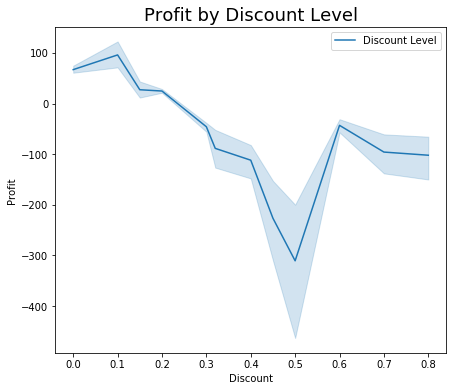

In [133]:
plt.figure(figsize=(7,6))
sns.lineplot(data['Discount'],data['Profit'], label = 'Discount Level');
plt.ylabel('Profit')
plt.title('Profit by Discount Level',fontsize = 18);

In [134]:
data_discounted = data[data['Discount'] > 0]
data_not_discounted = data[data['Discount'] == 0]

p = data_discounted['Quantity'].sum()
q = data_not_discounted['Quantity'].sum()

x = data_discounted['Sales'].mean()
y = data_not_discounted['Sales'].mean()

s = data_discounted['Profit'].mean()
t = data_not_discounted['Profit'].mean()

a = data_discounted['Sales'].sum()
b = data_not_discounted['Sales'].sum()

c = data_discounted['Profit'].sum()
d = data_not_discounted['Profit'].sum()

In [135]:
print(f"The total discounted quantity is {p} and not discounted is {q}.")
print()
print(f"The average sale per unit if the commodity is discounted is {round(x,2)} USD and if not discounted then {round(y,2)} USD.")
print(f"The average profit per unit if the commodity is discounted is {round(s,2)} USD and if not discounted then {round(t,2)} USD.")
print()
print(f"The total discounted sales is {round(a,2)} UDS and not discounted is {round(b,2)} USD.")
print(f"The total discounted profit is {round(c,2)} UDS and not discounted is {round(d,2)} USD.")

The total discounted quantity is 19590 and not discounted is 18230.

The average sale per unit if the commodity is discounted is 232.93 USD and if not discounted then 227.13 USD.
The average profit per unit if the commodity is discounted is -6.67 USD and if not discounted then 67.02 USD.

The total discounted sales is 1208918.03 UDS and not discounted is 1087277.56 USD.
The total discounted profit is -34602.98 UDS and not discounted is 320844.41 USD.


## Inference

**Sales and Profit have coorelation coefficient as 0.48 and it could be seen in different states.** 

California experiences maximum sales and quantity, offering an average discount of less than 10% and hence earning maximum profit. Texas has fair amount of sales and offers second highest discount of approximately 35% and ends up in highest loss.
Illinois observes medium sales and quantity and offers highest discount and remains in great loss. The discounts could be lowered in certain states in order to keep them away from losses.

The region wise sales and profit go hand in hand with being highest in the West and lowest in the south.

The product sold in maximum quantity is Blinders with average price less than 50 and profit being quite less. The average price is highest of copiers, but are sold in minimum quantity, yet earning maximum profit with maximum sales.

Sales of furniture is fairly good but since it offers maximum discount thus it makes least profit. And sales of technological products is highest, making highest amount of profit, even after offering minimum average profit.


# Thank you